In [ ]:
import sys
import os
from pathlib import Path
current_dir = Path(os.getcwd())
main_dir = str(current_dir.parent) 
sys.path.append(main_dir)
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt

# Machine Learning and Clustering
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.model_selection import train_test_split


# import the split lib to split the data into train and test
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [72]:
data_org = pd.read_csv('C:/Users/yoonus/Documents/GitHub/Stock_AI_Predictor/Data/Stocks/BTCUSD60.csv')
data_org['Date'] = data_org['Date'].astype('datetime64[s]')
data_org = data_org.set_index('Date')

# convert the data_org to stationary data (stander scale)
stander_scale = StandardScaler()
minimax_scale = MinMaxScaler()
data_org['Close'] =  minimax_scale.fit_transform(data_org['Close'].values.reshape(-1, 1))

data = data_org.loc['2020-01-01':'2023-12-28']
test_data = data_org.loc['2024-01-01':]

print(data.tail(1))
print(test_data.head(1))

             Time      Open     High       Low     Close  Volume
Date                                                            
2023-12-28  23:00  42488.69  42609.0  42335.17  0.373507       0
             Time      Open      High       Low     Close  Volume
Date                                                             
2024-01-01  00:00  42466.51  42545.81  41997.57  0.371656       0


In [73]:
scaler_train = MinMaxScaler()
def create_sequences(data, window_size=5, forecast_horizon=5):
    X = []
    y = []
    for i in range(len(data) - window_size - forecast_horizon + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + window_size + forecast_horizon])
    return np.array(X), np.array(y)


arr = data['Close'].to_numpy()

# Create sequences
X, y = create_sequences(arr, window_size=5, forecast_horizon=2)

# Reshape X to fit LSTM input: (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))
print(X.shape, y.shape)
print(X[0])
print(y[0])

(30137, 5, 1) (30137, 2)
[[0.03824507]
 [0.03825934]
 [0.03834017]
 [0.03814522]
 [0.03791222]]
[0.03751755 0.03761265]


In [66]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(42931, 5, 1) (42931, 2)
(10733, 5, 1) (10733, 2)


Epoch 1/20


c:\Users\yoonus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0031 - mae: 0.0204 - val_loss: 5.6003e-06 - val_mae: 0.0017
Epoch 2/20
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6279e-05 - mae: 0.0034 - val_loss: 3.8626e-05 - val_mae: 0.0059
Epoch 3/20
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.6490e-05 - mae: 0.0034 - val_loss: 1.9340e-05 - val_mae: 0.0040
Epoch 4/20
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.7172e-05 - mae: 0.0035 - val_loss: 1.6575e-05 - val_mae: 0.0036
Epoch 5/20
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.4466e-05 - mae: 0.0033 - val_loss: 5.2372e-06 - val_mae: 0.0016
Epoch 6/20
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5340e-05 - mae: 0.0034 - val_loss: 5.4645e-06 - val_mae: 0.0017
Epoch 7/20
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.2342e-05 - mae: 0.0031 - val_loss: 3.8370e-06 - val_mae: 0.0013
Epoch 8/20
1507/1507 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.1378e-05 - mae: 0.0030 - val_loss: 8.4416e-06 - val_mae

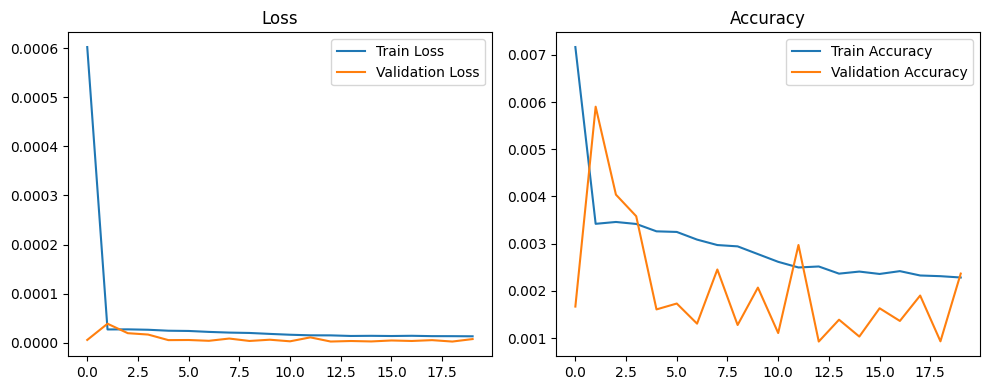

In [74]:

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(y_train.shape[1]))  # Output a single price value
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  # MAE or MSE for regression

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=16)

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train Accuracy')
plt.plot(history.history['val_mae'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.tight_layout()
plt.show()


# Predict using x_val

189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
(6028, 5, 1) (6028, 2)
(12056, 1) (12056, 1)


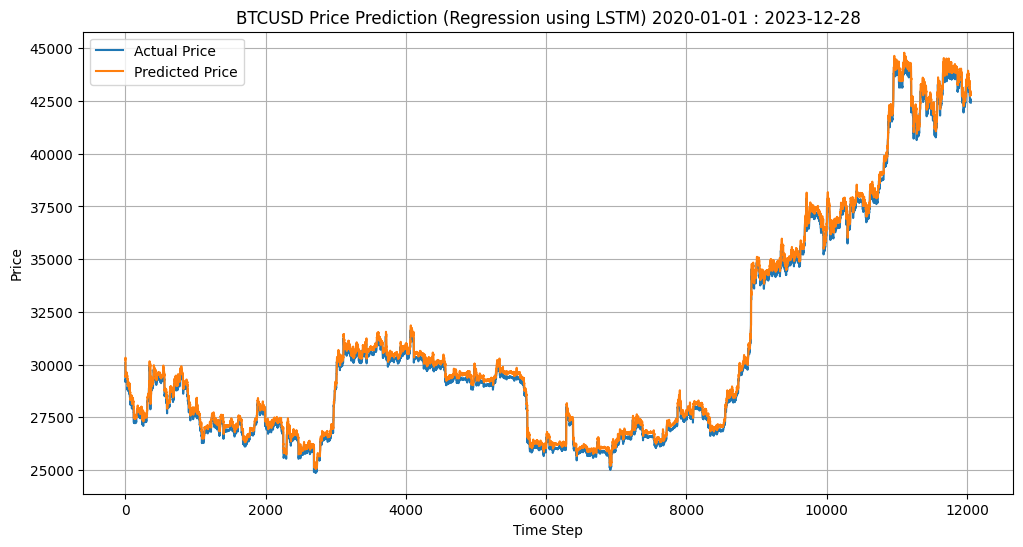

In [76]:

y_pred = model.predict(X_val)
print(X_val.shape, y_pred.shape)

# y_pred will be of shape (samples, forecast_horizon) , so make sure to reshape it to be the same as y_val
y_pred = y_pred.reshape(-1,1)


# Undo scaling if needed
y_pred_inv = minimax_scale.inverse_transform(y_pred)
y_val_inv =  minimax_scale.inverse_transform(y_val.reshape(-1, 1))

# reshape the y_pred_inv to be the same shape as y_val_inv
#y_pred_inv = y_pred_inv.reshape(-1, 1)
print(y_val_inv.shape, y_pred_inv.shape)
plt.figure(figsize=(12, 6))
plt.plot(y_val_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price') # get the fifth value of the prediction by using y_pred_inv[:, 4]
plt.title('BTCUSD Price Prediction (Regression using LSTM) 2020-01-01 : 2023-12-28')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Predict all data

347/347 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step
(11082,) (22152, 1)


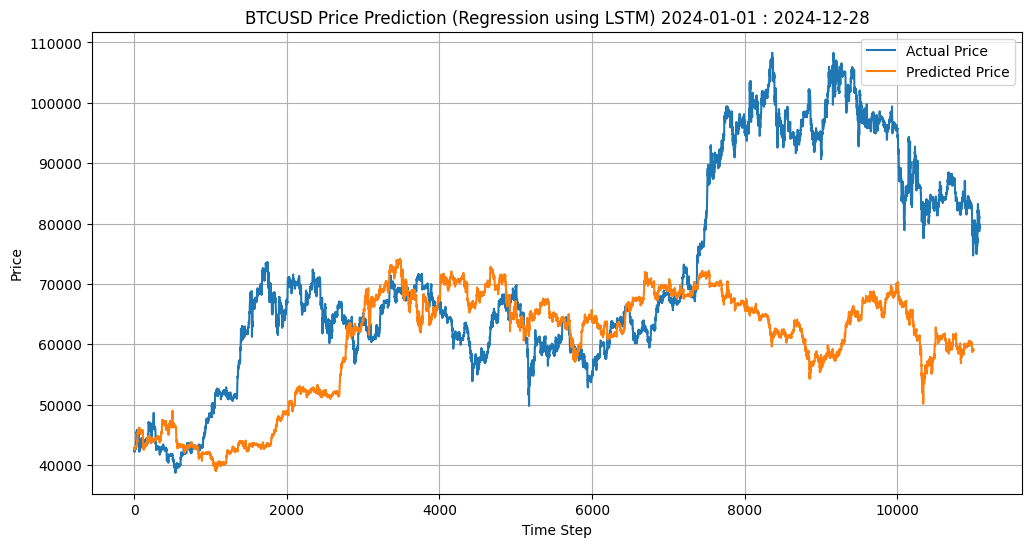

In [81]:
data = data_org.loc['2019-01-01':]
test_arr = test_data['Close'].to_numpy()


arr_test_scaled_sequences, _ = create_sequences(test_arr, window_size=5, forecast_horizon=2)


arr_test_scaled_sequences= arr_test_scaled_sequences.reshape((arr_test_scaled_sequences.shape[0], arr_test_scaled_sequences.shape[1], 1))

y_pred = model.predict(arr_test_scaled_sequences)
y_pred = y_pred.reshape(-1, 1)
print(test_arr.shape, y_pred.shape)

# Undo scaling if needed
y_pred_inv = minimax_scale.inverse_transform(y_pred)
test_arr_inv = minimax_scale.inverse_transform(test_arr.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(test_arr_inv, label='Actual Price')
plt.plot(y_pred_inv[0:11000], label='Predicted Price')
plt.title('BTCUSD Price Prediction (Regression using LSTM) 2024-01-01 : 2024-12-28')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


# Predict using future data

1678/1678 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step
(53670,) (107330, 1)


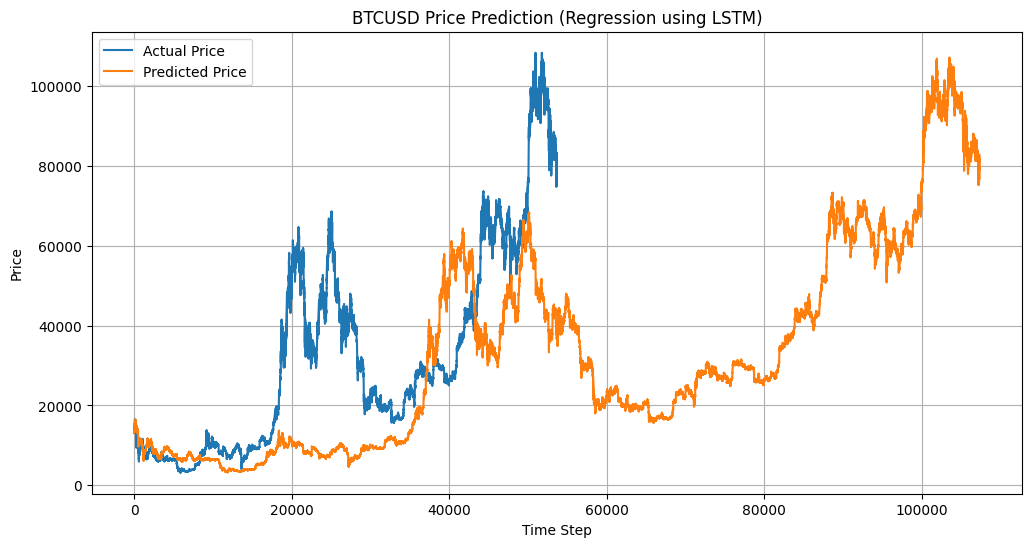

In [51]:
# prepere the test data
test_arr = test_data['Close'].to_numpy()


arr_test_scaled_sequences, _ = create_sequences(test_arr, window_size=5, forecast_horizon=1)


arr_test_scaled_sequences= arr_test_scaled_sequences.reshape((arr_test_scaled_sequences.shape[0], arr_test_scaled_sequences.shape[1], 1))

y_pred = model.predict(arr_test_scaled_sequences)
y_pred = y_pred.reshape(-1, 1)
print(test_arr.shape, y_pred.shape)

# Undo scaling if needed
y_pred_inv = minimax_scale.inverse_transform(y_pred)
test_arr_inv = minimax_scale.inverse_transform(test_arr.reshape(-1, 1))

plt.figure(figsize=(12, 6))
plt.plot(test_arr_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.title('BTCUSD Price Prediction (Regression using LSTM)')
plt.xlabel('Time Step')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
